# Solutions to Exercises 3

# Problem 1

## 1. a)

\begin{align*}
P(Y = +1 \mid X_1 = 1, X_2 = 2) &= \frac{p(X_1 = 1, X_2 = 2 \mid Y = +1 )P(Y = +1)}{p(X_1 = 1, X_2 = 2)} \\
&= \frac{p(X_1 = 1 \mid Y = +1)p(X_2 = 2 \mid Y = +1))P(Y = +1)}{p(X_1 = 1, X_2 = 2)},
\end{align*}

where

$$p(X_1 = 1, X_2 = 2) = p(X_1 = 1, X_2 = 2 \mid Y = +1 )P(Y = +1) + p(X_1 = 1, X_2 = 2 \mid Y = -1 )P(Y = -1)$$

Since conditional distributions are Gaussian, and they are assumed to have the same mean and variance for given $Y = y$, we can write

$$p(X_1 = x \mid Y = +1) = p(X_2 = x \mid Y = +1) =  \mathcal{N}(x \mid \hat{\mu}_{+},\hat{\sigma}^2_{+})$$
and
$$
p(X_1 = x \mid Y = -1) = p(X_2 = x \mid Y = -1) =  \mathcal{N}(x \mid \hat{\mu}_{-},\hat{\sigma}^2_{-}).
$$ 

Using this and setting $P(Y = -1)= P(Y = +1) = 1/2 $ (which means that the prior probabilities cancel), we have

$$
\begin{align*}
P(Y = +1 \mid X_1 = 1, X_2 = 2) &= \frac{\mathcal{N}(1 \mid \hat{\mu}_{+},\hat{\sigma}^2_{+})\mathcal{N}(2 \mid \hat{\mu}_{+},\hat{\sigma}^2_{+})}{\mathcal{N}(1 \mid \hat{\mu}_{+},\hat{\sigma}^2_{+})\mathcal{N}(2 \mid \hat{\mu}_{+},\hat{\sigma}^2_{+}) + \mathcal{N}(1 \mid \hat{\mu}_{-},\hat{\sigma}^2_{-})\mathcal{N}(2 \mid \hat{\mu}_{-},\hat{\sigma}^2_{-})} \\
&= \frac{(\frac{1}{\sigma_+} \,e^{-1/(2\sigma_+^2)}) \,(\frac{1}{\sigma_+} \, e^{-2^2/(2\sigma_+^2)})}
 {(\frac{1}{\sigma_+} \, e^{-1 / (2\sigma_{+}^2)})\,(\frac{1}{\sigma_+} \, e^{-2^2/(2\sigma_+^2)}) + 
 (\frac{1}{\sigma_-} \, e^{-1/(2\sigma_-^2)})\,(\frac{1}{\sigma_-} \, e^{-2^2/(2\sigma_-^2)})} \\
 &= \frac{\frac{1}{\sigma_+^2} e^{-5/(2\sigma_+^2)}}{\frac{1}{\sigma_+^2} e^{-5/(2\sigma_+^2)} + \frac{1}{\sigma_-^2} e^{-5/(2\sigma_-^2)}} \\
 &= \frac{\frac{1}{16} e^{-5/32}}{\frac{1}{16} e^{-5/32}+ e^{-5/2}} \approx 0.3944.
\end{align*}
$$

## 1. b)

The following function evaluates the posterior probability $P(Y = +1 \mid X_1 = x_1, X_2 = x_2)$

In [1]:
# note that the inputs 'sd_plus' and 'sd_minus' are standard deviations, not variances
posterior <- function(x, mu_plus = 0, mu_minus = 0, sd_plus = 4, sd_minus = 1) {
  joint_plus <- dnorm(x[1], mu_plus, sd_plus) * dnorm(x[2], mu_plus, sd_plus)
  joint_minus <- dnorm(x[1], mu_minus, sd_minus) * dnorm(x[2], mu_minus, sd_minus)
  return(joint_plus / (joint_plus + joint_minus))  
}

Next, we create a grid of points and evaluate the posterior probability at each point:

In [2]:
# create grid and compute densities for the grid points
grid_1d <- seq(-7,7, by = .25) 
grid_2d <- expand.grid(grid_1d, grid_1d)
grid_density1 <- apply(grid_2d, 1, posterior)

Visualize the result using 'persp' function:

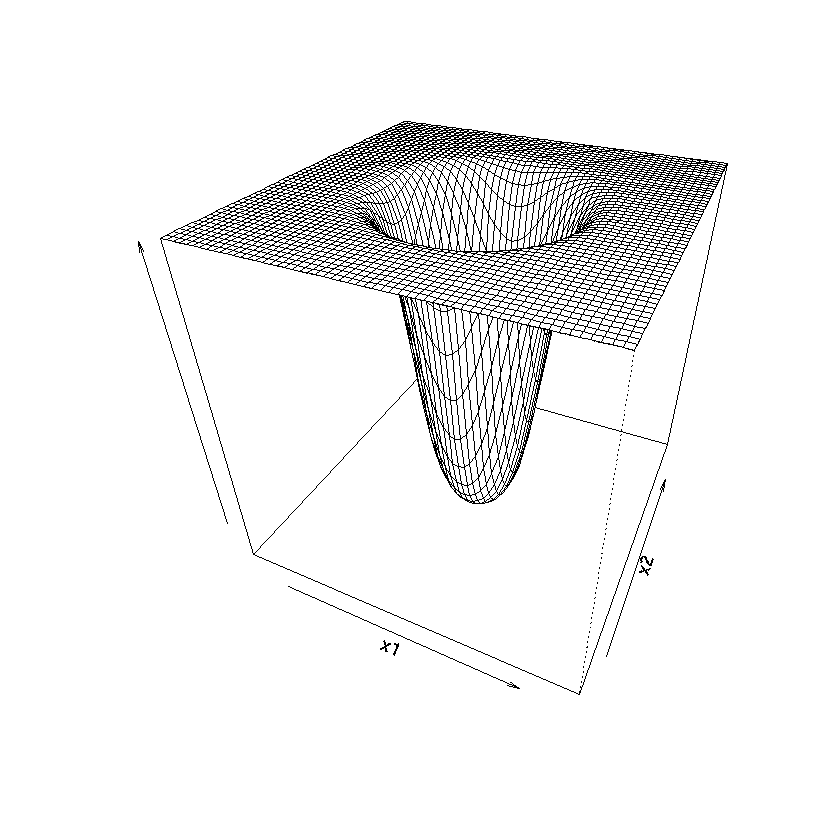

In [3]:
grid_matrix <- matrix(grid_density1, nrow = length(grid_1d))
persp(grid_1d, grid_1d, grid_matrix, theta = 25, phi = 35, xlab = 'x1', ylab = 'x2', zlab = 'P(Y = +1 | x)')

We can see that the posterior probability for the class $Y = +1$ is low near the origin and increases as we go further away from it. This can be seen also by inspecting the parameters of the classifier. Both class conditional distributions have their expected value at the origin. However, the variance of each feature is larger under the class $Y = +1$ compared to class $Y = -1$ so it is more likely that an observation far from the origin comes from the class $Y = +1$. 

## 1. c)

Both the naive Bayes classifier with Gaussian densities
  and QDA are based on the Bayes formula 
  
  $$
  p(y\mid \boldsymbol{x}) = {p(\boldsymbol{x} \mid y) \ p(y) \over p(\boldsymbol{x})},
  $$
  
  and therefore, assuming equivalent class distributions $p(y)$, we
  only need to show that for the given class-conditional 
  distribution implied by a naive Bayes classifier $p(\boldsymbol{x} \mid y)$,
  we can construct a QDA classifier with the same class-conditional
  distribution.

  Since the naive Bayes model implies that $X_1$ and $X_2$
  are independent given $Y$, we are looking for a bivariate
  Gaussian density for the QDA model that is equivalent to the
  product of two Gaussian densities. This tells us that the
  covariance matrix must be diagonal.
  
  Furthermore, given that the class-conditional distribution under the
  QDA model must match that of the NB model, and in particular, that
  the means and variances of $X_1$ and $X_2$ must match those of the
  NB model, we arrive at the following QDA parameters:

$$
\begin{split}
\boldsymbol{\mu}_+ &= (\mu_{+,1}, \mu_{+,2}) = (0,0), \\
\boldsymbol{\mu}_- &= (\mu_{-,1}, \mu_{-,2}) = (0,0),
\end{split}
$$
and class-conditional covariance matrices
$$
\begin{split}
\boldsymbol{\Sigma}_+ &= \begin{bmatrix}
\sigma_{+,1}^2 & 0 \\
0 & \sigma_{+,2}^2
\end{bmatrix}
= \begin{bmatrix}
16 & 0 \\
0 & 16
\end{bmatrix}, \\
\boldsymbol{\Sigma}_- &= \begin{bmatrix}
\sigma_{-,1}^2 & 0 \\
0 & \sigma_{-,2}^2
\end{bmatrix}
= \begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}.
\end{split}
$$

Fix $y \in \{-1,+1\}$ and consider the conditional density $p(\boldsymbol{x}\,|\,Y = y)$ with the naive Bayes assumption. Because $\boldsymbol{\Sigma}_y$ is a diagonal matrix, we can use exercise 2. (a) from exercise set 2 to notice that this is a density function of a bivariate normal distribution with expected value $\boldsymbol{\mu}_y$ and covariance matrix $\boldsymbol{\Sigma}_y$: 

\begin{split}
p(\boldsymbol{x}\,|\,y) &= \mathcal{N}(x_1 \mid \mu_{y,1},\sigma_{y,1}^2  )\mathcal{N}(x_2 \mid \mu_{y,2},\sigma_{y,2}^2 ) \quad\quad \text{Naive assumption} \\
&= \frac{1}{\sqrt{2\pi\sigma_{y,1}^2}}\exp\left(-\frac{(x_1-\mu_{y,1})^2}{2\sigma_{y,1}^2}\right)
\frac{1}{\sqrt{2\pi\sigma_{y,2}^2}}\exp\left(-\frac{(x_2-\mu_{y,2})^2}{2\sigma_{y,2}^2}\right) \\
&= \frac{1}{2\pi\sigma_{y,1}\sigma_{y,2}}\exp\left(-\frac{1}{2}\sum_{i=1}^2 \frac{(x_i - \mu_{y,i})^2}{\sigma_{y,i}^2}\right)\\
&= \frac{1}{2\pi |\boldsymbol{\Sigma}_y|^{1/2}}
\exp\left(-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu}_y)^T \boldsymbol{\Sigma}_y^{-1} (\boldsymbol{x} - \boldsymbol{\mu}_y) \right) \quad \text{Exercises 2,  problem 2.a)}
\end{split}

This demonstrates that a Gaussian naive Bayes is a special case of QDA with diagonal covariance matrices (this is a naive Bayes assumption that predictors are independent given a class).

## 1. d)

We are looking at a classification problem with $p$ predictors and $k$ classes.

Consider first the number of parameters required by the naive Bayes classifier. Fix the class $y \in \{1, \ldots , k\}$. Now the number of parameters required to specify the class conditional distribution $P(\boldsymbol{X} \mid Y = y) =  P(X_1 \mid Y =  y)\cdot \ldots \cdot P(X_p \mid Y = y)$ is $2p$, since each $P(X_i \mid Y =  y)$ is univariate Gaussian, thus requiring two parameters (the expected value $\mu_{y,i}$ and variance $\sigma_{y,i}^2$). We have $k$ classes, so the total number of parameters required by naive Bayes is $2kp$.

In QDA, each class conditional distribution, $P(\boldsymbol{X} \mid Y = y)$, is a multivariate normal distribution with expected value $\boldsymbol{\mu}_y = (\mu_{y,i}, \ldots \mu_{y,p})$ and a covariance matrix $\boldsymbol{\Sigma}_y \in \mathbb{R}^{p \times p}$. The covariance matrix is symmetric, so it has $p(p+1)/2$ free parameters ($p$ variances on the diagonal, and $p(p-1)/2$ covariances). This shows that we need in total $k(p + p(p+1)/2) = k(p^2 + 3p)/2 $ parameters in QDA.

In addition to these, both QDA and naive Bayes use $k-1$ free parameters for the class distibution $P(y)$.

The dependence of number of the free parameters on the number of predictors is quadratic for QDA, but only linear for naive Bayes. Hence, the general QDA is more prone to overfitting and requires a larger sample size to reach its asymptotic error. 

# Problem 2


## 2. a)

We use the following function to create the data:

In [4]:
generate_data <- function(n_sim) {
    
    # generate the class labels
    Y <- sample(0:2, size = n_sim, replace = TRUE, prob = c(0.4,0.3,0.3))  
  
    X_combinations <- as.matrix(expand.grid(0:1,0:2)) # create all the possible combinations of X1 and X2
    X <- matrix(0, nrow = n_sim, ncol = 2) # initialize a matrix for features values
  
    for(i in 1:n_sim) {
    
        # select the right class conditional distribution for X1 and X2 based on the sampled class Y[i]  
        prob <- switch (Y[i]+1,
                        c(0.2,0.1,0.4,0.2,0.0,0.1),
                        c(0.6,0.1,0.1,0.1,0.1,0.0),
                        c(0.1,0.4,0.3,0.0,0.2,0.0))
      
        # use this distribution to sample values for X1 and X2
        X[i, ] <- X_combinations[sample(1:6, size = 1, replace = TRUE, prob = prob),]
      }
        
      return(list(X = X, Y = Y))
}

Now, we generate some data and see if the numbers roughly match the ones suggested in the exercise sheet:

In [5]:
set.seed(12345)
n <- 100
data <- generate_data(n)

X <- data$X
Y <- data$Y

Check how many samples came from the class $Y = 0$

In [6]:
sum(Y == 0)

[1] 40

Then, check how many observations there are with $X_1 = 0$ and $X_2 = 0$:

In [7]:
sum(X[,1] == 0 & X[,2] == 0)


[1] 28

These match closely the suggested values. But why do we expect to see around 29 observations with $X_1 = 0$ and $X_2 = 0$? This follows from the law of total probability:

$$
\begin{align*}
P(X_1 = 0, \ X_2 = 0) &= \sum_{i = 0}^2 P(X_1 = 0, \ X_2 = 0 \mid Y = i)P(Y = i) \\
&= 0.2 \cdot 0.4 + 0.6 \cdot 0.3 + 0.1 \cdot 0.3 \\
&= 0.29
\end{align*}
$$

## 2. b)

The following function implements the training of a naive Bayes classifier. The returned value is a fitted naive Bayes classifier which is here an instance of class 'nb'. The input parameters are:
- class labels 'Y' and the corresponding feature values 'X'
- the number of classes 'n_classes'
- a vector containing the cardinalities of the features 'n_class_x'
- the smoothing parameter 'a' (corresponding to $\alpha$ in the exercise sheet)

In [8]:
nb <- function(Y, X, n_class = 3, n_class_x = c(2,3), a = 1) {
    n <- length(Y) # number of samples in the training data
    
    # initialize a list to store the estimated class conditional probabilities
    likelihood <- vector('list', length = n_class)
  
    # the same for the class probabilities  
    prior <- numeric(n_class)
    

    for(c in 0:(n_class-1)) {
    
        n_c <- sum(Y == c) # the number of observations with Y = c 
        prior[c+1] <- (n_c + a) / (n + n_class * a) # the formula in the exercise sheet
        
        # consider each feature separately
        for(i in seq_along(n_class_x)) {
            
            likelihood[[c+1]][[i]] <- numeric(n_class_x[i]) # vector whose length is the cardinality of X_i            
            
            # loop over possible values of X_i
            for(j in 0:(n_class_x[i]-1)) {
                
                n_cj <- sum(Y == c & X[ ,i] == j) # count how many times we observe X_i = j when Y = c
                likelihood[[c+1]][[i]][j+1] <- (n_cj + a) / (n_c + n_class_x[i] * a) # estimated probability    
            }
        }
    }
    
    ret <- list(prior = prior, likelihood = likelihood, n_class = n_class, n_class_x = n_class_x)
    class(ret) <- 'nb' # define that the list 'ret' belongs to class 'nb' 
    
    return(ret)
}

We can now apply our classifier to data generated in part a)

In [9]:
a <- 1 # laplace smoothing
trained_nb <- nb(Y,X, a = 1)

The estimated distribution over classes, with $\alpha = 1$:

In [10]:
trained_nb$prior

[1] 0.3980583 0.3495146 0.2524272

Print the estimated conditional probability distribution $P(X_i \mid Y = c)$

In [11]:
c <- 0
i <- 2

trained_nb$likelihood[[c + 1]][[i]]
sum(trained_nb$likelihood[[c + 1]][[i]])

[1] 0.3255814 0.5116279 0.1627907

[1] 1

## 2. c)

We start by defining a prediction function for our naive Bayes classifier. Inputs are: 
- 'nbfit', a fitted naive Bayes model 
- 'X' data matrix containing the observations to be classified
- 'probablities' boolean determining the output type. If 'TRUE', posterior probabilities are returned, and if 'FALSE', the function returns the class label with the highest posterior probability. 

In [12]:
predict.nb <- function(nbfit, X, probabilities = FALSE) {
  n <- nrow(X)
  prob <- matrix(0, nrow = n, ncol = nbfit$n_class) 
    
  for(i in 1:n) # compute joint probabilities p(x,y) = p(x|y)p(y)
    for(c in 1:nbfit$n_class) {
      prob[i,c] <- nbfit$prior[c] # prior p(y)      
      for(j in seq_along(nbfit$n_class_x))
        prob[i,c] <- prob[i,c] * nbfit$likelihood[[c]][[j]][X[i,j] + 1] #likelihood p(x_1| y)p(x_2|y) = p(x|y)
    }
  prob <- prob / rowSums(prob)      # normalize into conditional probabilities p(y|x) 
  pred <- max.col(prob) - 1        # predict class y as argmax p(y|x)
  if(probabilities) prob else pred             
}      

Create a test set of size $10 000$ and compute the test error:

In [13]:
set.seed(1231)
test_data <- generate_data(10000)
test_Y <- test_data$Y

test_df <- data.frame(Y=test_Y,X1 = factor(test_data$X[,1]),X2 = factor(test_data$X[,2])) # this is used later in part d)

y_hat <- predict(trained_nb,test_data$X)

cat("\nTest error:",sum(y_hat != test_Y)/length(test_Y))


Test error: 0.4409

Next, we consider different training set sizes and look how this affects the test error. We consider naive Bayes classifiers with different smoothing parameters and multinomial logistic regression (see part d)  

In [14]:
set.seed(12222)

# library containing implementation of multinomial logistic regression
library('nnet')

train_sizes <- 100*2**(-2:6) # considered training sample sizes

results <- data.frame(matrix(0,nrow = length(train_sizes), ncol = 4)) # store results
rownames(results) <- train_sizes
colnames(results) <- c("NB_ML","NB_Lap","NB_KT","LogReg")

alphas <- c(0,1,1/2) # smoothing parameters

for(jj in seq_along(train_sizes)) {
    
    # create the data
    train_data <- generate_data(train_sizes[jj])
    X <- train_data$X
    Y <- train_data$Y
    
    # train & predict for the naive Bayes classifiers with different smoothing parameters
    for(ii in seq_along(alphas)) {
        
            nb_fit <- nb(Y,X,a = alphas[ii])          
            y_hat <- predict(nb_fit,test_data$X)
            results[jj,ii] <- sum(test_data$Y != y_hat) 
            
    }
    
    # for the logistic regression, we need to put the data into data frame with predictors defined as factors
    train_df <- data.frame(Y = train_data$Y, X1 = factor(train_data$X[ ,1]), X2 = factor(train_data$X[ ,2]))
    
    # trace = FALSE, convergence information won't be printed
    logistic_fit <- multinom(Y ~ X1 + X2, data = train_df, trace = FALSE) 
    y_hat <- predict(logistic_fit,newdata = test_df)
    results[jj,4] <- sum(test_data$Y != y_hat)     
    
}

results <- results/length(test_data$Y)


Plot the results:

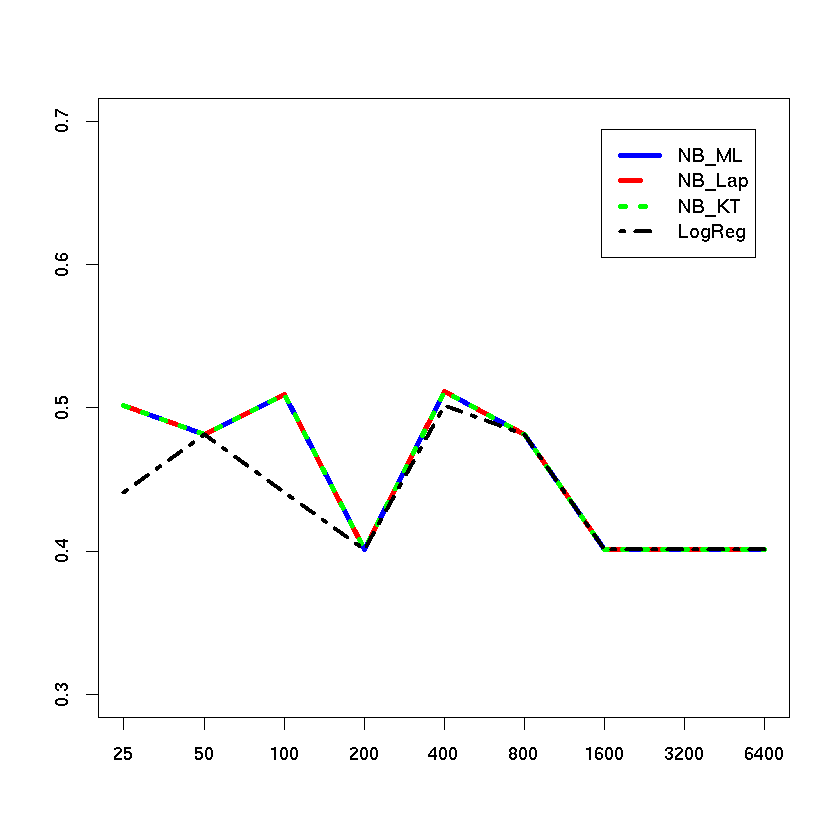

In [15]:
matplot(results,
        type = 'l',
        col = c('blue', 'red', 'green', 'black'), 
        lwd = c(4,4,4,3), 
        lty = c(1,2,3,4),
        ylab = 'test error', 
        ylim = c(.3, .7),
        xaxt = "n")

axis(1, at=1:nrow(results), labels=rownames(results))

legend("topright", 
       legend = colnames(results),
       inset=.05, 
       col = c('blue', 'red', 'green', 'black'), 
       lwd = c(4,4,4,3), 
       lty = c(1,2,3,4))

We can see that here smoothing does not seem to have any effect on the predicted class labels. However, the estimated posterior probabilities would differ (especially) on small sample sizes. Naive Bayes classifiers seem to converge towards a test error of $0.4$.

## 2. d)

We can see that the logistic regression performs quite similarly to naive Bayes and it seems to converge to the same asymptotic value. 

To check if the naive assumption holds in the generating distribution, we need to recall the definition of conditional independence. Assume that $X_1$, $X_2$ and $Y$ are discrete random variables. We say that $X_1$ is conditionally indepedent of $X_2$ given $Y$ if, and only if

$$
P(X_1 = x_1, \ X_2 = x_2 \mid Y = y) = P(X_1 = x_1 \mid Y = y)\cdot P(X_2 = x_2 \mid Y = y)
$$

holds for every $x_1,x_2$ and $y$ (such that $P(Y = y) > 0$). Let's check if this holds here. Consider the distribution $P(X_1,X_2 \mid Y = 2)$. We can observe, that:

$$
P(X_1 =  0,X_2 = 0 \mid Y = 2) = 0.1
$$

but

$$
P(X_1 = 0 \mid Y = 2)\cdot P(X_2 = 0 \mid Y = 2) = (0.1 + 0.2 + 0.3)\cdot(0.1 + 0.4) = 0.3 
$$

This implies that there is dependence between the features (at least when $Y = 2$), so the naive assumption does not hold in the generating distribution. This hints that we should be able to get a lower asymptotic test error if we used a classifier that takes into account the conditional dependencies between the features. Logistic regression does not either explicitly model these dependencies (the relationship between the log-odds and predictors is additive, that is, the effect of changing the value of predictor $X_j$ on the log-odds is independent of the values of the other predictors, see book Chap. 3.3.2). This explains the similar test error on large sample sizes in this exercise.

## Problem 3

## 3. a)

In the figure below, the decision tree is grown on the penalty data set. First the data is split into upper half $R_1$ and lower half $\{R_2, \dots ,R_6\}$, then the lower half is split into a left corner $R_2$ and the rest $\{R_3, \dots , R_6\}.$ The numbers in each cell indicate the amount of saved shots (darker green) and the scored ones (lighter green).

![](penalties3.png)


## 3. b)

The gains of the splits using misclassification error as impurity measure are tabulated below. 


$$
\begin{matrix}
\text{Split} & Q(D_1) & Q(D_2) & Q(D) & gain(D_1,D_2)\\
R_1 & 3/52 & 35/116 & 38/168 & 0 \\
R_2 & 0/21 & 35/95 & 35/116 & 0\\
R_3 & 6/27 & 29/68 & 35/95 & 0\\
R_4 & 10/26 & 19/42 & 29/68 & 0\\
R_5 & 3/15 & 11/27 & 19/42 & 0.119 \\
\end{matrix}
$$

Because the first four splits do not affect the classification in any way (shots in every partition $R_1, \dots, R_5$) are classified as goals, they do not lead to any improvement in misclassification error. However, in $R_6$ the majority of the shots were saved, so in it the shots are classified as saved. Hence, the last split improves the misclassification error, and so also the gain.

This demonstrates why, when growing the decision tree automatically, the quality of the splits is usually measured using ''soft'' measures such as cross-entropy or Gini index. 